# 激活函数

介绍常用的激活函数

In [6]:
import torch
from d2l import torch as d2l

## ReLU函数

最受欢迎的选择是线性整流单元（Rectified linear unit，ReLU），因为它实现简单，同时在各种预测任务中表现良好。 ReLU提供了一种非常简单的非线性变换。 给定元素 x ，ReLU函数被定义为该元素与 0 的最大值：$\operatorname{ReLU}(x)=\max (x, 0)$

通俗地说，ReLU函数通过将相应的激活值设为0来仅保留正元素并丢弃所有负元素。ReLU是分段线性的


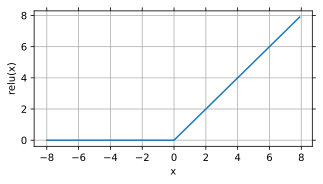

In [12]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

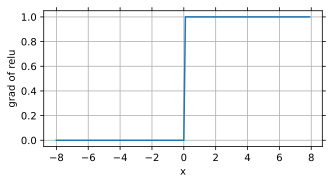

In [13]:
#当输入为负，ReLU函数的导数为0，当输入为正，ReLU的导数为1.当输入值精确等于0时，ReLU函数不可导。
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

### 知识点:

1. `torch.arange(start=0,end,step=1,out=None)`用于返回一维张量，最终结果不含end

    参数:

    * `start`: 点集的起始值，默认0

    * `end`:点集的最终值

    * `step`: 每对相邻点之间的间隙，默认1

    * `out(Tensor,optional)`:输出张量

2. `detach()`返回一个新的Variable，从当前计算图中分离，但仍指向原变量存放的位置，该Variable永不需计算梯度，**即使之后重新将它的`requires_grad`置为`true`,它也不具有梯度`grad`**

    这样继续使用这个新的Variable进行计算，后面当进行反向传播时，到该调用detach()的Variable就会停止，不能再继续向前进行传播
3. `torch.ones_like(input, dtype=None, layout=None, device=None, requires_grad=False) -> Tensor`
   
   返回一个填充标量值1的张量,大小与input相同。
   
   参数：
   * input (Tensor) – the size of input will determine size of the output tensor
   * dtype (torch.dtype, optional) – the desired data type of returned Tensor. Default: if None, defaults to the dtype of input.
   * layout (torch.layout, optional) – the desired layout of returned tensor. Default: if None, defaults to the layout of input.
   * device (torch.device, optional) – the desired device of returned tensor. Default: if None, defaults to the device of input.
   * requires_grad (bool, optional) – If autograd should record operations on the returned tensor. Default: False.
4. `torch.autograd.backward(tensors, grad_tensors=None, retain_graph=None, create_graph=False, grad_variables=None, inputs=None)`
   函数用于计算梯度，在调用之前先清空过往梯度`optimizer.zero_grad()`，函数使用后注意更新权重参数`optimizer.step()`

   参数：
   * `tensor`如果是标量，函数计算参数`tensor`对于给定图叶子节点的梯度(graph leaves，即为设置requires_grad=True的变量);否则，需要另外指定参数`grad_tensors`，该参数必须与`tensor`长度相同，该情况下，函数实现的是**代价函数（loss=tensors.dot(grad_tensors),内积）**关于叶子节点的梯度计算，而不是参数tensors对于给定图叶子节点的梯度。
   * **grad_tensors**: 在计算矩阵的梯度时会用到。他其实也是一个`tensor`，shape一般需要和前面的`tensor`保持一致。
   * **grad_variables(`Tensor`列表)**:对应`variable`的梯度。仅当`variable`非标量且需要求梯度的时候使用
   * **retain_variables(bool)**:通常在调用一次backward后，pytorch会自动把计算图销毁，所以要想对某个变量重复调用backward，则需要将该参数设置为`True`
   * **`create_graph`**当设置为True时，用于计算更高阶的梯度
   * **`input`**：叶子节点

## Sigmoid函数

对于一个定义域在 R 中的输入，sigmoid函数将输入变换为区间(0, 1)上的输出。因此，sigmoid通常称为挤压函数（squashing function）：它将范围(-inf, inf)中的任意输入压缩到区间(0, 1)中的某个值：$\operatorname{sigmoid}(x)=\frac{1}{1+\exp (-x)}$

当想要将输出视作二分类问题的概率时，sigmoid仍然被广泛用作输出单元上的激活函数（你可以将sigmoid视为softmax的特例）。然而，sigmoid在隐藏层中已经较少使用，它在大部分时候已经被更简单、更容易训练的ReLU所取代

绘制sigmoid函数。注意，当输入接近0时，sigmoid函数接近线性变换

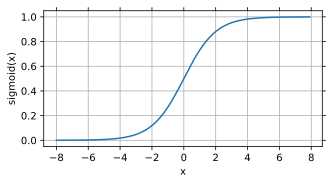

In [14]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

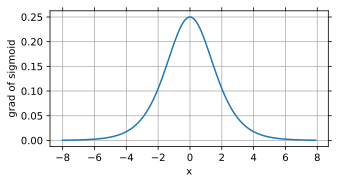

In [15]:
# 清除以前的梯度。
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

与sigmod函数类似,tanh（双曲正切）函数也能将其输入压缩转化到区间(-1，1）上，函数公式如下:$tanh(x)=\frac{1-exp(-2x)}{1+exp(-2x)}$
绘制tanh函数。注意，当输入在0附近时，tanh函数接近线性变换。函数的形状类似于sigmoid函数，不同的是tanh函数关于坐标系原点中心对称。

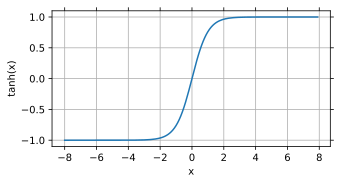

In [16]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

tanh函数的导数:$frac{d}{dx}tanh(x)=1-tan^2(x)$

tanh函数的导数图像如图所示。当输入接近0时，tanh函数的导数接近最大值1。与sigmoid函数图像看到的类似，输入在任何方向上越远离0，导数越接近零。

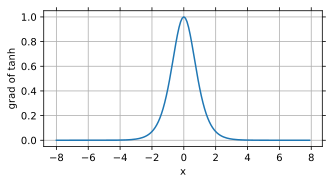

In [17]:
# 清除以前的梯度。
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

# 多层感知机的从零实现

In [1]:
import torch
from torch import nn
from d2l import torch as d2l


batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [2]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

## 激活函数
使用最大值函数实现Relu激活函数，而非调用内置的relu函数

In [3]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

## 模型
忽略空间结构，所以使用reshape将每个二维图像转换为一个长度为num_inputs的向量。只需几行代码就可以实现我们的模型

In [4]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

In [5]:
#损失函数
loss = nn.CrossEntropyLoss()

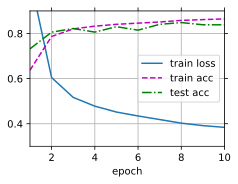

In [7]:
# 训练
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

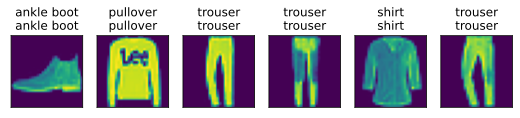

In [8]:
d2l.predict_ch3(net, test_iter)

# 多层感知机的简洁实现

In [9]:
import torch
from torch import nn
from d2l import torch as d2l

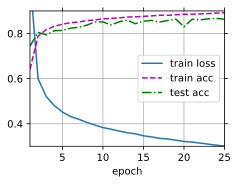

In [13]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01) # 从给定均值mean和标准差std的正态分布中生成值，填充输入的张量或变量

net.apply(init_weights);

batch_size, lr, num_epochs = 256, 0.1, 25
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

# 模型选择、欠拟合和过拟合

**训练误差**：模型在训练数据集上计算得到的误差

**泛化模型**:将模型应用在同样从原始样本的分布中抽取的无限多的数据样本时，模型误差的期望。在实际中，只能通过将模型应用于一个独立的测试集来估计泛化误差，该测试集由随机选取的、未曾在训练集中出现的数据样本构成。

*训练误差明显低于验证误差*，说明出现严重的过拟合现象。但该问题不是一件坏事，特别是在深度学习领域，最好的预测模型在训练数据上的表现比保留数据好得多。最终通常更关心验证误差，而不是训练误差和验证误差之间的差距。
## 过拟合与欠拟合的决定因素
是否过拟合或欠拟合可能取决于模型复杂性和可用训练数据集的大小。

高阶多项式的参数较多，模型函数的选择范围较广。因此在固定训练数据集的情况下，高阶多项式函数相对于低阶多项式的训练误差应该始终更低（最坏也是相等）。事实上，当数据样本包含了 x 的不同值时，函数阶数等于数据样本数量的多项式函数可以完美拟合训练集。
高阶多项式的参数较多，模型函数的选择范围较广。因此在固定训练数据集的情况下，高阶多项式函数相对于低阶多项式的训练误差应该始终更低（最坏也是相等）。事实上，当数据样本包含了$x$的不同值时，函数阶数等于数据样本数量的多项式函数可以完美拟合训练集。下图直观地描述多项式的阶数和欠拟合与过拟合之间的关系。

训练数据集中的样本越少，就越有可能（且更严重地）遇到过拟合。随着训练数据量的增加，泛化误差通常会减小。此外，一般来说，更多的数据不会有什么坏处。对于固定的任务和数据分布，模型复杂性和数据集大小之间通常存在关系。给出更多的数据，可能会尝试拟合一个更复杂的模型。能够拟合更复杂的模型可能是有益的。如果没有足够的数据，简单的模型可能更有用。对于许多任务，深度学习只有在有数千个训练样本时才优于线性模型。从一定程度上来说，深度学习目前的成功要归功于海量数据集。

In [2]:
#多项式回归
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

### 生成数据集
给定$x$，我们将使用以下三阶多项式来生成训练和测试数据的标签：$y=5+1.2 x-3.4 \frac{x^{2}}{2 !}+5.6 \frac{x^{3}}{3 !}+\epsilon$ where $\epsilon \sim \mathcal{N}\left(0,0.1^{2}\right)$

噪声项$\epsilon$服从均值为0且标准差为0.1的正态分布。在优化的过程中，通常希望避免非常大的梯度值或损失值。此即将特征从$x^i$调整为$\frac{x^i}{i!}$的原因，这样可避免很大的i带来的特别大的指数值。

In [3]:
max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # `gamma(n)` = (n-1)!
# `labels`的维度: (`n_train` + `n_test`,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

同样，存储在poly_features中的单项式由gamma函数重新缩放，其中 $\Gamma(n)=(n−1)!$ 。从生成的数据集中查看一下前2个样本。第一个值是与偏置相对应的常量特征。

In [4]:
# NumPy ndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    d2l.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[ 0.8908],
         [-0.0701]]),
 tensor([[ 1.0000e+00,  8.9078e-01,  3.9675e-01,  1.1781e-01,  2.6235e-02,
           4.6739e-03,  6.9391e-04,  8.8303e-05,  9.8324e-06,  9.7317e-07,
           8.6688e-08,  7.0201e-09,  5.2111e-10,  3.5708e-11,  2.2720e-12,
           1.3492e-13,  7.5117e-15,  3.9361e-16,  1.9479e-17,  9.1323e-19],
         [ 1.0000e+00, -7.0060e-02,  2.4542e-03, -5.7313e-05,  1.0038e-06,
          -1.4066e-08,  1.6424e-10, -1.6438e-12,  1.4396e-14, -1.1206e-16,
           7.8510e-19, -5.0003e-21,  2.9194e-23, -1.5733e-25,  7.8732e-28,
          -3.6773e-30,  1.6102e-32, -6.6359e-35,  2.5828e-37, -9.5238e-40]]),
 tensor([5.3493, 4.9031]))

### 对模型进行训练和测试

实现评估模型在给定数据集上的损失

In [5]:
def evaluate_loss(net, data_iter, loss):  #@save
    """评估给定数据集上模型的损失。"""
    metric = d2l.Accumulator(2)  # 损失的总和, 样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [6]:
# 定义训练函数

In [7]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式特征中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

### 三阶多项式函数拟合(正态)
首先使用三阶多项式函数，它与数据生成函数的阶数相同。结果表明，该模型能有效降低训练损失和测试损失。学习到的模型参数也接近真实值$w=[5,1.2,−3.4,5.6]$

weight: [[ 4.99597    1.185553  -3.3997154  5.6345167]]


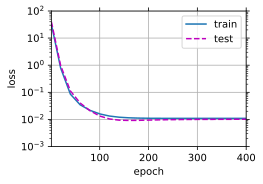

In [8]:
# 从多项式特征中选择前4个维度，即 1, x, x^2/2!, x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

### 线性函数拟合(欠拟合)
经历了早期的下降之后，进一步减少该模型的训练损失变得困难。在最后一个迭代周期完成后，训练损失仍然很高。当用来拟合非线性模式（如这里的三阶多项式函数）时，线性模型容易欠拟合。

weight: [[ 4.90954     1.4263821  -3.01423     4.8014426  -0.95646006  0.9278681 ]]


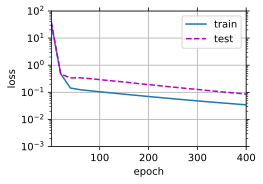

In [10]:
# 从多项式特征中选择前2个维度，即 1, x
train(poly_features[:n_train, :3], poly_features[n_train:, :3],
      labels[:n_train], labels[n_train:])

### 高阶多项式函数拟合(过拟合)
在这种情况下，没有足够的数据用于学到高阶系数应该具有接近于零的值。因此，这个过于复杂的模型会轻易受到训练数据中噪声的影响。虽然训练损失可以有效地降低，但测试损失仍然很高。结果表明，复杂模型对数据造成了过拟合。

weight: [[ 5.000025    1.2386404  -3.4267757   5.373247    0.13114172  0.76773036
   0.06458109 -0.08868216  0.26828974  0.08341407 -0.151537    0.03750068
   0.03189638 -0.1417183   0.09676772  0.14453176  0.1422917   0.17925154
   0.19177383  0.10807139]]


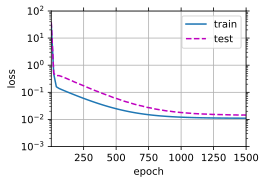

In [11]:
# 从多项式特征中选取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

# 权重衰减
限制特征的数量是缓解过拟合的一种常用技术。随着阶数$d$的增长，带有阶数$d$的项数迅速增加。给定$k$个变量，阶数$d$（即$k$多选$d$）的个数为 $\left(\begin{array}{c}k-1+d \\ k-1\end{array}\right)$ 。即使是阶数上的微小变化，比如从2到3，也会显著增加我们模型的复杂性。因此，我们经常需要一个更细粒度的工具来调整函数的复杂性。
## 范数与权重衰减
$L_1$范数(向量中各个元素绝对值之和，**可用于特征选择，即让特征的系数变为0**)和$L_2$范数(向量中个元素的平方和求平方根,**可防止过拟合，提升模型泛化能力，有助于处理condition number不好下的矩阵**)

在训练参数化机器学习模型时，权重衰减（通常称为 $L_2$正则化）是最广泛使用的正则化的技术之一。这项技术是基于一个基本直觉，即在所有函数 $f$中，函数 $f=0$（所有输入都得到值0）在某种意义上是最简单的，可以通过函数与零的距离来衡量函数的复杂度。但是我们应该如何精确地测量一个函数和零之间的距离呢？没有一个正确的答案。一种简单的方法是通过线性函数 $f(x)=w⊤x$中的权重向量的某个范数来度量其复杂性，例如$||w||^2$ 。要保证权重向量比较小，最常用方法是将其范数作为惩罚项加到最小化损失的问题中。将原来的训练目标最小化训练标签上的预测损失，调整为最小化预测损失和惩罚项之和。 现在，如果权重向量增长的太大，学习算法可能会更集中于最小化权重范数 $||w||^2$。

损失由下式给出:$L(\mathbf{w}, b)=\frac{1}{n} \sum_{i=1}^{n} \frac{1}{2}\left(\mathbf{w}^{\top} \mathbf{x}^{(i)}+b-y^{(i)}\right)^{2}$,其中$\mathbf{x}^{(i)}$是样本i的特征,$y^{(i)}$是样本i的标签。$(\mathbf{w},b)$是权重和偏置参数。为惩罚权重向量的大小，必须以某种方式在损失函数中添加$||w||^2$,即通过正则化常数$\lambda$来描述权衡(平衡额外惩罚的损失)，该参数是一个非负超参数，使用验证数据拟合:$L(\mathbf{w}, b)+\frac{\lambda}{2}\|\mathbf{w}\|^{2}$，对于$\lambda=0$，恢复原来的损失函数。对于$\lambda > 0$，限制$||w||^2$的大小，仍除以2;当取一个二次函数的导数时，2和1/2 会抵消，以确保更新表达式看起来既漂亮又简单。

通过平方$L_2$范数，去掉平方根，留下权重向量每个分量的平方和。这使得惩罚的导数很容易计算：导数的和等于和的导数。

**$L_2$范数的选择**：$L_2$正则化线性模型构成经典的岭回归（ridge regression）算法，$L_1$正则化线性回归是统计学中类似的基本模型，通常被称为套索回归（lasso regression）。使用$L_2$范数的一个原因是它对权重向量的大分量施加了巨大的惩罚。是的学习算法偏向于在大量特征上均匀分布权重的模型。事实上，可对单个变量的观测误差更鲁棒。$L_1$惩罚会导致模型将其他权重清除为零而将权重集中在一小部分特征上。这称为*特征选择*（feature selection），这可能是其他场景下需要的。

$L_2$ 正则化回归的小批量随机梯度下降更新如下式：$\mathbf{w} \leftarrow(1-\eta \lambda) \mathbf{w}-\frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)}\left(\mathbf{w}^{\top} \mathbf{x}^{(i)}+b-y^{(i)}\right)$
根据估计值与观测值的差异更新$\mathbf{w}$，同时试图将$\mathbf{w}$的大小缩到零。此即该方法有时被称为**权重衰减**。仅考虑惩罚项，优化算法在训练的每一步衰减权重。与特征选择相比，权重衰减为我们提供了一种连续的机制来调整函数的复杂度。较小的λ值对应较少约束的w，而较大的λ值对w的约束更大。
是否对相应的偏置$b^2$进行惩罚在不同的实现中会有所不同。在神经网络的不同层中也会有所不同。通常，我们不正则化网络输出层的偏置项。
### 高维线性回归
通过一个简单的例子来说明演示权重衰减

In [13]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

## 从零开始实现权重衰减
只需将$L_2$的平方惩罚添加到原始目标哈数中

In [20]:
# 定义函数来随机初始化模型参数
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [15]:
# 定义L2范数惩罚
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [21]:
# 定义训练代码实现
'''
将模型拟合训练数据集，并在测试数据集上进行评估。通过d2l,linreg和d2l.squared_loss导入线性网络和平方损失(添加惩罚项)
'''
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                # 增加了L2范数惩罚项，广播机制使l2_penalty(w)成为一个长度为`batch_size`的向量。
                l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

w的L2范数是： 13.461267471313477


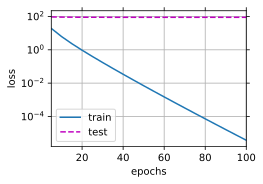

In [22]:
#使用lambd=0禁用权重衰减，忽略正则化直接训练
train(lambd=0)

w的L2范数是： 0.3665854334831238


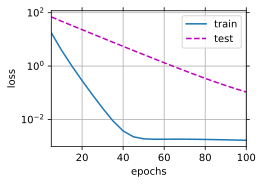

In [24]:
train(lambd=3)

### 简介实现
权重衰减在神经网络优化中很常见，深度学习框架为便于使用权重衰减，将权重衰减集成到优化算法，以便与任何损失函数结合使用。此外，这种集成还有计算上的好处，允许在不增加任何额外的计算开销的情况下向算法中添加权重衰减。由于更新的权重衰减部分仅依赖于每个参数的当前值，因此优化器必须至少接触每个参数一次。

In [25]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减。
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                trainer.zero_grad()
                l = loss(net(X), y)
            l.backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

w的L2范数： 13.670761108398438


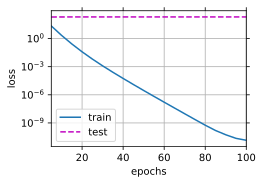

In [26]:
train_concise(0)

w的L2范数： 0.40382128953933716


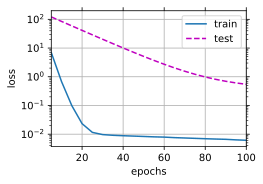

In [27]:
train_concise(3)

# dropout
实现单层的dropout函数，我们必须从伯努利（二元）随机变量中提取与我们的层的维度一样多的样本，其中随机变量以概率$1−p$ 取值1（保持），以概率p取值0（丢弃）。实现这一点的一种简单方式是首先从均匀分布$U[0,1]$ 中抽取样本。那么我们可以保留那些对应样本大于p的节点，把剩下的丢弃。

在下面的代码中，我们实现dropout_layer函数，该函数以dropout的概率丢弃张量输入X中的元素，如上所述重新缩放剩余部分：将剩余部分除以1.0-dropout。

In [28]:
import torch
from torch import nn
from d2l import torch as d2l


def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # 在本情况中，所有元素都被丢弃。
    if dropout == 1:
        return torch.zeros_like(X)
    # 在本情况中，所有元素都被保留。
    if dropout == 0:
        return X
    mask = (torch.Tensor(X.shape).uniform_(0, 1) > dropout).float()
    return mask * X / (1.0 - dropout)

In [29]:
# 几个例子测试drout_layer函数。下面代码，输入x通过dropout操作，丢弃概率分别是0,0.5,1
X= torch.arange(16, dtype = torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  2.,  4.,  0.,  0.,  0.,  0., 14.],
        [ 0., 18.,  0., 22.,  0.,  0., 28., 30.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [30]:
# 定义模型参数，使用Fashion-MNIST数据集,定义具有两个隐层的多层感知机，每个隐藏层包含256个单元
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

In [31]:
# 定义模型
'''
模型将dropout应用于每个隐藏层的输出（在激活函数之后）,可以分别为每一层设置丢弃概率。 一种常见的技巧是在靠近输入层的地方设置较低的丢弃概率。将第一个和第二个隐藏层的丢弃概率分别设置为0.2和0.5,确保dropout只在训练期间有效。
'''
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # 只有在训练模型时才使用dropout
        if self.training == True:
            # 在第一个全连接层之后添加一个dropout层
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # 在第二个全连接层之后添加一个dropout层
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out


net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

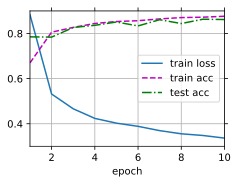

In [32]:
# 训练和测试
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 简洁实现
对于高级API，我们所需要做的就是在每个全连接层之后添加一个Dropout层，将丢弃概率作为唯一的参数传递给它的构造函数。在训练过程中，Dropout层将根据指定的丢弃概率随机丢弃上一层的输出（相当于下一层的输入）。当不处于训练模式时，Dropout层仅在测试时传递数据。

In [33]:
net = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # 在第一个全连接层之后添加一个dropout层
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # 在第二个全连接层之后添加一个dropout层
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

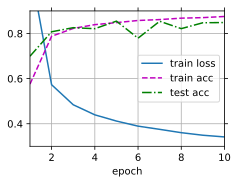

In [34]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

# 正向传播、反向传播和计算图
梯度的自动计算（自动微分）大大简化了深度学习算法的实现。在自动微分之前，即使是对复杂模型的微小调整也需要手工重新计算复杂的导数。
在本节中，将深入探讨 反向传播（backward propagation 或 backpropagation）的细节。为了传达对这些技术及其实现的一些见解，依赖一些基本的数学和计算图。首先，将重点放在带权重衰减（ L2 正则化）的单隐藏层多层感知机上。